In [11]:
import yfinance as yf
import pandas as pd
import cufflinks as cf
import plotly
import plotly.graph_objects as go

cf.go_offline()

In [3]:
ticker_stock = ["BAC", "C", "GS", "JPM", "MS", "WFC"]
data = yf.download(ticker_stock, start="2006-01-01", end="2016-01-01", group_by='ticker')
bank_data = {ticker: data[ticker] for ticker in ticker_stock}
bank_stocks = pd.concat(bank_data.values(), axis=1, keys=ticker_stock)


close_prices = bank_stocks.xs(key='Close', axis=1, level=1)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


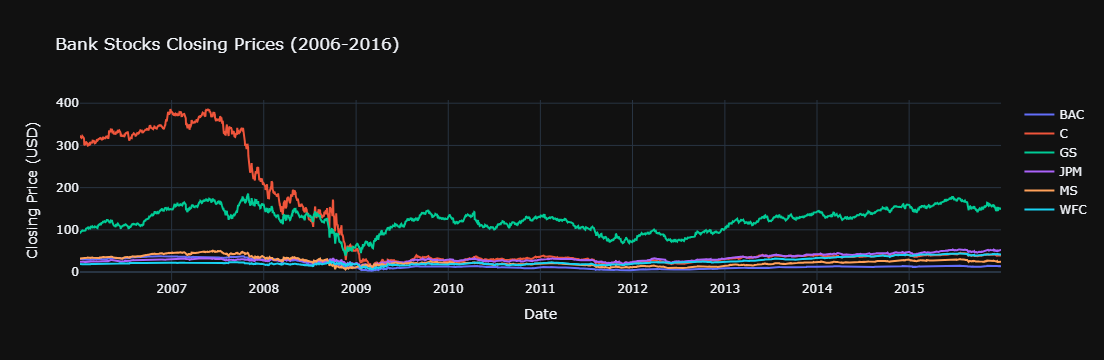

In [16]:
fig = go.Figure()

for ticker in ticker_stock:
    fig.add_trace(go.Scatter(x=close_prices.index, y=close_prices[ticker], mode='lines', name=ticker))

# This line of code is adding a trace (a line plot) to the fig object in Plotly. Let's break down the arguments:

# x=close_prices.index
# Sets the x-axis data for the plot
# In your case, close_prices is a DataFrame with dates as the index
# So, close_prices.index provides a series of dates (e.g., 2006-01-03, 2006-01-04, etc.)


# y=close_prices[ticker]
# Sets the y-axis data for the plot
# close_prices[ticker] extracts the closing prices of the current ticker (e.g., BAC, C, GS, etc.) from the close_prices DataFrame
# This provides a series of stock prices corresponding to the dates in x



fig.update_layout(
    title='Bank Stocks Closing Prices (2006-2016)',
    xaxis_title='Date',
    yaxis_title='Closing Price (USD)',
    template='plotly_dark'
)

fig.show()

In [7]:
print(plotly.__version__)

6.0.0
